In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory



# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

Single digit training

In [2]:
import pandas as pd
import pickle

# Replace 'your_file.pkl' with the actual path to your pkl file
file_path = '/kaggle/input/dataset/bhand.pkl'

# Load data from the pkl file using pickle
with open(file_path, 'rb') as file:
    data_dict = pickle.load(file, encoding = 'latin1')
    #trainSet,validSet,testSet = cPickle.load(file, encoding = 'latin1')

# Separate datasets into individual DataFrames
#trainset_df = pd.DataFrame(data_dict['trainset'])
#validset_df = pd.DataFrame(data_dict['validset'])
#testset_df = pd.DataFrame(data_dict['testset'])

# Now you can work with your individual DataFrames


In [3]:
import pickle

# Replace 'your_file.pkl' with the actual path to your pkl file
file_path = '/kaggle/input/dataset/bhand.pkl'

# Load data from the pkl file using pickle
with open(file_path, 'rb') as file:
    data = pickle.load(file, encoding = 'latin1')

# Convert the loaded data to a DataFrame if needed
df = pd.DataFrame(data)

# Now you can work with your DataFrame 'df'


In [4]:
df.head()

,0,1
0,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[6, 1, 7, 3, 3, 4, 5, 6, 0, 5, 7, 9, 6, 4, 3, ..."
1,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[7, 0, 7, 1, 7, 4, 5, 7, 2, 1, 6, 5, 5, 2, 3, ..."
2,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[6, 6, 9, 7, 1, 8, 4, 2, 7, 6, 8, 4, 2, 7, 9, ..."


In [5]:
first_el = df.iloc[0, 0]

In [6]:
first_el.shape

(50000, 1024)

In [7]:
x = df.iloc[0, 1]

In [8]:
print(len(x))

50000


In [9]:
y = df.iloc[1, 1]
print(len(y))

10000


In [10]:
z = df.iloc[2, 1]
print(len(y))

10000


In [11]:
X_train, y_train = first_el, x

In [12]:
X_val, y_val = df.iloc[1, 0], y

In [13]:
X_test, y_test = df.iloc[2, 0], z

In [14]:
import numpy as np

# Assuming X_train and X_val are your arrays with shapes (50000, 32, 32, 1) and (10000, 32, 32, 1) respectively

# Concatenate along the first axis (assuming these are image data)
X_combined = np.concatenate((X_train, X_val), axis=0)
y_combined = np.concatenate((y_train, y_val), axis = 0)
# Verify the shape of the combined array
print(X_combined.shape)  # Output: (60000, 32, 32, 1)
y_combined = y_combined.reshape(-1, 1)
print(y_combined.shape)

(60000, 1024)
(60000, 1)


In [15]:
for i in range(len(X_combined)):
    X_combined[i] = (X_combined[i] >= 0.5).astype(int)

In [16]:
X_train = X_train.reshape(-1, 32, 32, 1)
print(X_train.shape)

(50000, 32, 32, 1)


In [17]:
X_val = X_val.reshape(-1, 32, 32, 1)
print(X_val.shape)

(10000, 32, 32, 1)


In [18]:
X_test = X_test.reshape(-1, 32, 32, 1)
print(X_test.shape)

(10000, 32, 32, 1)


7


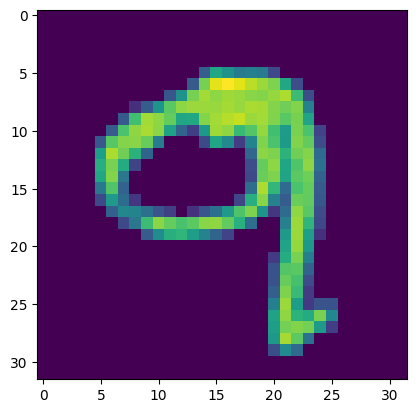

In [19]:
import matplotlib.pyplot as plt

plt.imshow(X_train[10])
print(y_train[10])

In [20]:
#result_array = (your_array >= 0.5).astype(int)

for i in range(len(X_train)):
    X_train[i] = (X_train[i] >= 0.5).astype(int)
for i in range(len(X_val)):
    X_val[i] = (X_val[i] >= 0.5).astype(int)
    X_test[i] = (X_test[i] >= 0.5).astype(int)

In [21]:
np.unique(X_train[0])

array([0., 1.])

7


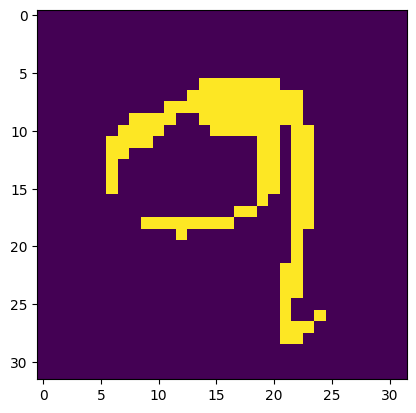

In [22]:
plt.imshow(X_train[10])
print(y_train[10])

In [34]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Define the CNN model
model = Sequential()

# Convolutional layer with 32 filters, kernel size 3x3, and 'relu' activation
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 1)))

# Max pooling layer with pool size 2x2
model.add(MaxPooling2D((2, 2)))

# Convolutional layer with 64 filters, kernel size 3x3, and 'relu' activation
model.add(Conv2D(64, (3, 3), activation='relu'))

# Max pooling layer with pool size 2x2
model.add(MaxPooling2D((2, 2)))

# Flatten layer to convert 2D features to a vector
model.add(Flatten())

# Fully connected layer with 128 neurons and 'relu' activation
model.add(Dense(128, activation='relu'))

# Output layer with 10 neurons for 10 classes (digits 0 to 9) and 'softmax' activation
model.add(Dense(10, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Print the model summary
model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 30, 30, 32)        320       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 15, 15, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_3 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 2304)              0         
                                                                 
 dense_2 (Dense)             (None, 128)              

In [29]:
X_combined = X_combined.reshape(-1, 32, 32, 1)
print(X_combined.shape)

(60000, 32, 32, 1)


In [32]:
X_train.shape

(50000, 32, 32, 1)

In [35]:
import numpy as np

# Convert y_train list to a NumPy array
y_train = np.array(y_train)

model.fit(X_train, y_train, epochs=10, batch_size=32)

Epoch 1/10
1563/1563 [==============================] - 7s 3ms/step - loss: 0.2532 - accuracy: 0.9188
Epoch 2/10
1563/1563 [==============================] - 5s 3ms/step - loss: 0.1090 - accuracy: 0.9653
Epoch 3/10
1563/1563 [==============================] - 5s 3ms/step - loss: 0.0756 - accuracy: 0.9748
Epoch 4/10
1563/1563 [==============================] - 5s 3ms/step - loss: 0.0572 - accuracy: 0.9809
Epoch 5/10
1563/1563 [==============================] - 5s 3ms/step - loss: 0.0454 - accuracy: 0.9863
Epoch 6/10
1563/1563 [==============================] - 5s 3ms/step - loss: 0.0364 - accuracy: 0.9885
Epoch 7/10
1563/1563 [==============================] - 5s 3ms/step - loss: 0.0306 - accuracy: 0.9907
Epoch 8/10
1563/1563 [==============================] - 5s 3ms/step - loss: 0.0299 - accuracy: 0.9911
Epoch 9/10
1563/1563 [==============================] - 5s 3ms/step - loss: 0.0326 - accuracy: 0.9913
Epoch 10/10
1563/1563 [==============================] - 5s 3ms/step - loss: 0.029

In [36]:
y_val = np.array(y_val)
y_test = np.array(y_test)

In [37]:
predictions = model.predict(X_test)
predicted_labels = np.argmax(predictions, axis=1)


313/313 [==============================] - 1s 1ms/step


In [38]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.2507 - accuracy: 0.9656


[0.25067591667175293, 0.9656000137329102]

In [39]:
print(y_test[0])
print(predicted_labels[0])

6
6


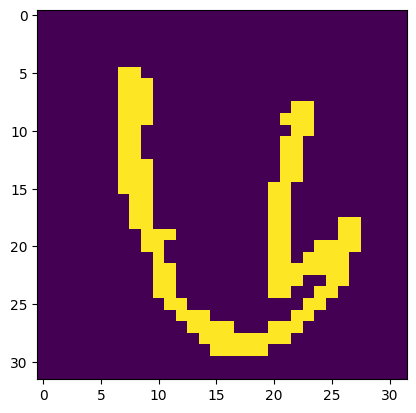

In [40]:
plt.imshow(X_test[0])

**Number**

In [41]:
from keras.models import save_model
save_model(model, 'cnn.h5')

/tmp/ipykernel_42/1330848939.py:2: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  save_model(model, 'cnn.h5')


In [42]:
from keras.models import load_model
model = load_model('cnn.h5')

(451, 748)


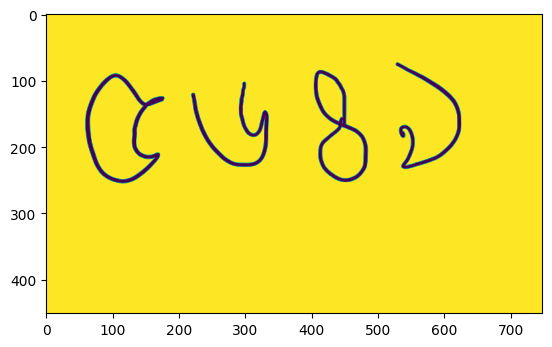

In [57]:
import cv2

image = cv2.imread('/kaggle/input/another/8.png')
image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
plt.imshow(image)
print(image.shape)

(451, 748)


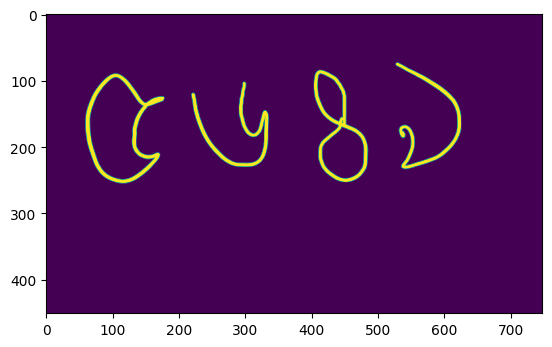

In [58]:
inverted_image = cv2.bitwise_not(image)
#inverted_image = image
plt.imshow(inverted_image)
print(inverted_image.shape)

In [59]:
inverted_image  = inverted_image[:, :, 0]
plt.imshow(inverted_image)

IndexError: too many indices for array: array is 2-dimensional, but 3 were indexed

In [60]:
inverted_image = (inverted_image >= 0.5).astype(int)

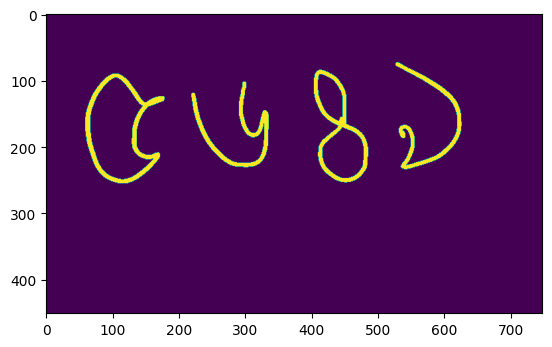

In [61]:
plt.imshow(inverted_image)

In [62]:
(row, col) = inverted_image.shape
inverted_image.shape

(451, 748)

In [63]:
flag = False
start = []
end = []
for i in range(col):
    sum = 0
    for j in range(row):
        sum += inverted_image[j][i]
    #print(sum)
    if sum != 0 : 
        #print('dhukse')
        if flag == False :
            print(i)
            start.append(i-2)
            flag = True
    else:
        if flag == True :
            print(i)
            end.append(i+2)
            flag = False
            

59
179
219
336
404
486
527
627


In [54]:
print(len(start))
print(len(end))

2
2


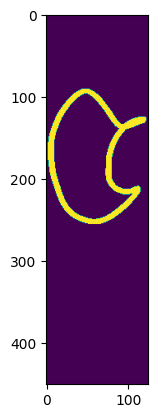

1/1 [==============================] - 0s 18ms/step
[6]


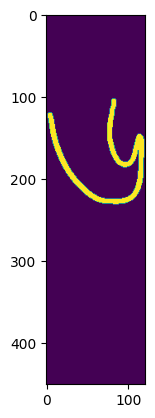

1/1 [==============================] - 0s 18ms/step
[6]


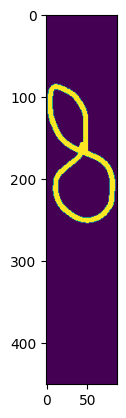

1/1 [==============================] - 0s 18ms/step
[8]


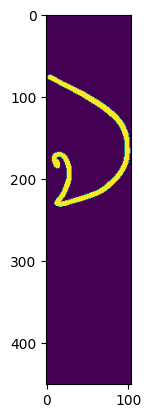

1/1 [==============================] - 0s 17ms/step
[2]
The number is :  [6682]


In [64]:
from PIL import Image

number = 0

for i in range(len(start)):
    digit = inverted_image[:, start[i]:end[i]]
    digit = digit.astype(np.uint8)  
    pil_image = Image.fromarray(digit)
    new_shape = (32, 32)
    reshaped_digit = np.array(Image.fromarray(digit).resize(new_shape))
    reshaped_digit = reshaped_digit.reshape(-1, 32, 32, 1)
    #pil_image.show()
    
    plt.imshow(pil_image)
    plt.show()
    pred = model.predict(reshaped_digit)
    predicted_labels = np.argmax(pred, axis=1)
    print(predicted_labels)
    number = number * 10 + predicted_labels
    #pil_image = pil_image.reshape(-1, 32, 32, 1)
    #digit = digit.reshape(-1, 32, 32, 1)
print("The number is : ", number)